In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/My Drive/Colab Notebooks/NLP/Simpsons_word2vec/'

In [4]:
import sys
sys.path.append(data_dir)

In [5]:
import torch
from torch import nn
import torchvision.models as models

import torchvision as tv
import time

import os

In [6]:
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [7]:
dev

device(type='cuda')

## Домашнее задание
1. Скачать датасет с фразами симпосонов - https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data
2. Обучить word2vec на фразах персонажей
3. Визуаилизировать embeddings по самым частотным словам (top 1000)
4. Найти самые близкие слова для:
  homer - marge + bart
  bart - lisa + school
  marge - homer + home  
5* попробовать построить классификатор bart/lisa с использованием этих эмбеддингов

In [8]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Датасет

In [9]:
cols = ['id', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms', 'speaking_line',
        'character_id', 'location_id', 'raw_character_text', 'raw_location_text',
        'spoken_words', 'normalized_text', 'word_count']
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP/Simpsons_word2vec/simpsons_script_lines.csv"
                ,names = cols
                ,error_bad_lines=False
                ,warn_bad_lines=False
                ,low_memory=False
                )
df = df.dropna()
print(f'Total len without NaN : {len(df)}')

Total len without NaN : 131709


In [10]:
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
1,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
2,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
3,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
4,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5


### word2vec

In [11]:
corpus = df.iloc[1:, :].normalized_text.apply(lambda x : x.split())

In [12]:
corpus.head()

1    [no, actually, it, was, a, little, of, both, s...
2                              [wheres, mr, bergstrom]
3    [i, dont, know, although, id, sure, like, to, ...
4                      [that, life, is, worth, living]
5    [the, polls, will, be, open, from, now, until,...
Name: normalized_text, dtype: object

In [13]:
from gensim.models import Word2Vec

In [14]:
model = Word2Vec(corpus, min_count=1)
words = list(model.wv.vocab)
print(f'Distinct words : {len(words)}')

Distinct words : 46814


In [15]:
words[:5]

['no', 'actually', 'it', 'was', 'a']

### Получить и визуализировать top 1000 частотных слов

In [16]:
n = 1000
top_n = model.wv.index2entity[:n]

In [17]:
X = model[top_n]

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

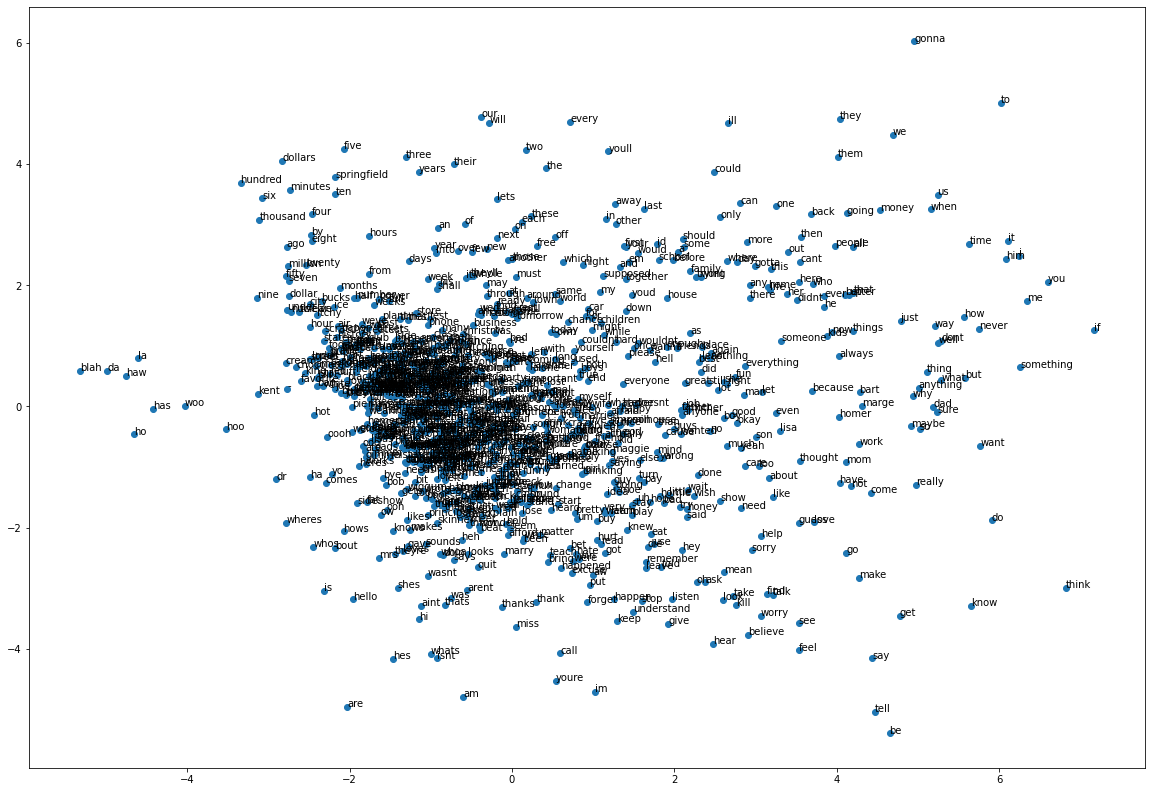

In [19]:
plt.figure(figsize=(20, 14))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(top_n):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))    
plt.show()

### Найти самые близкие слова

In [20]:
#homer - marge + bart
model.most_similar(positive=['homer', 'bart'], negative=['marge'], topn=5)

[('lisa', 0.8663143515586853),
 ('milhouse', 0.7314039468765259),
 ('maggie', 0.7151654958724976),
 ('grampa', 0.714336097240448),
 ('dad', 0.6957336068153381)]

In [21]:
#bart - lisa + school
model.most_similar(positive=['bart', 'school'], negative=['lisa'], topn=5)

[('game', 0.8168579339981079),
 ('house', 0.8165164589881897),
 ('church', 0.7659429311752319),
 ('christmas', 0.7627637386322021),
 ('town', 0.7585654258728027)]

In [22]:
#marge - homer + home
model.most_similar(positive=['marge', 'home'], negative=['homer'], topn=5)

[('back', 0.8120081424713135),
 ('dinner', 0.7143052816390991),
 ('sleep', 0.7081829309463501),
 ('bed', 0.7049371004104614),
 ('boys', 0.6989428400993347)]

### 5* попробовать построить классификатор bart/lisa с использованием этих эмбеддингов